## Analyzing Ride Data for a Bike Company

#### INTRODUCTION
In this project, we will analyze a year’s worth of bike-sharing ride data to uncover key insights that will guide strategic decisions across multiple departments within the company, ultimately improving the company's operations and decision-making for the coming year.

1. Marketing
2. Operations
3. Customer Insights
4. Finance


#### UNDERSTAND THE DATASET
The dataset comprises monthly ride records for November 2020-2021, including details such as:
- Ride start and end times
- Station locations and name
- Bike types (e.g docked bike, standard bike, electric bike)
- user types (members and casual users)

By leveraging this data, we aim to gain a deeper understanding of rider behavior, station usage patterns, and the financial impact of the bike-sharing service.

#### DATA CLEANING
Before this analysis, we cleaned, processed and extarcted the monthly dataset, you can check the process out in the 'Data Cleaning' notebook. Here are tasks we performed the notebook:
- From the 'started_at' and 'ended_at' columns we derived teh following:
    - Ride Duration
    - Time of Day [Early Morning, Afternoon, Evening ..], Date, Day, Hour of the Day
    - Season
- Generated a revenue column from the ride duration, using the pricing schema from BIKE SHARE TORONTO.
- Holiday date column - Scraped holiday event data, cleaned and joined to our data.
- Historic Weather data - Got the weather data from that period, including:
    - Weather Condition (Rain, Snow, Cloud etc)
    - Temperature
    - Humidity
    - Windspeed
- Drop duplicated 'ride_id'
- Handled null rows
- Remove outliers using IQR 

ALL SOURCES will be linked below

#### CONTENT
1. Import libraries and data
2. Department Analysis
    - Marketing
    - Operations
    - Customer Insights
    - Finance
3. Insights/Recommendations for each department
4. Export for report/data visualization


# 1. Import Libraries and Data
Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and added more libraries as I went along on the project

In [55]:
import pandas as pd #for data manipulation and analysis
import seaborn as sns # Data visualization packages
import matplotlib.pyplot as plt

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [56]:
# Import our cleaned data
df = pd.read_csv(r'./Cleaned Data.csv')

# Convert datetime
df['started_at'] = pd.to_datetime(df['started_at'],format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'],format='%Y-%m-%d %H:%M:%S')

C:\Users\Razak\AppData\Local\Temp\ipykernel_2188\4084072989.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'./Cleaned Data.csv')


# 2. Analysis

## a. Marketing Department
The marketing department focuses on promoting the bike-sharing service to attract new customers and retain existing ones. They craft marketing campaigns and strategies to engage different user segments, such as casual riders and members. The data needs usually consists of the following:
- User Segmentation
- Promotional Timing
- Revenue Generation

#### Q1. What are the peak times - months and days, for member vs. casual riders?
- This helps identify when to target promotions.

C:\Users\Razak\AppData\Local\Temp\ipykernel_2188\2861228745.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\Razak\AppData\Local\Temp\ipykernel_2188\2861228745.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
C:\Users\Razak\AppData\Local\Temp\ipykernel_2188\2861228745.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


The peak MONTH by members:
Members - September 
Casuals - July

The peak DAY OF WEEK by members:
Members - Wednesday 
Casuals - Saturday

The peak TIME OF DAY by members:
Members - 17 
Casuals - 17


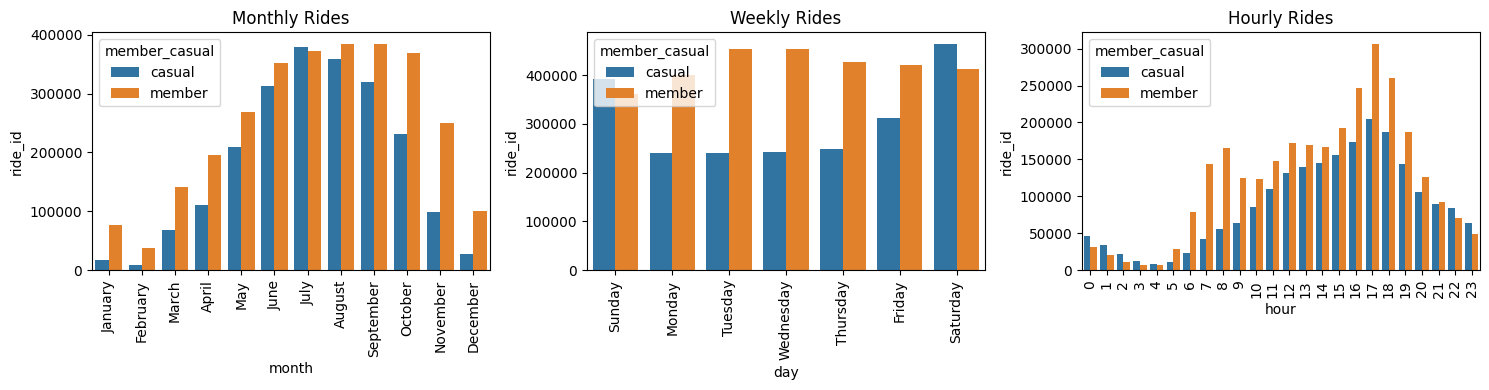

In [57]:
# Plot the number of rides
week_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Order month column
month_order = ['January', 'February', 'March','April', 'May','June','July', 
         'August', 'September', 'October','November','December']


# Month-Month Rides
fig, axes = plt.subplots(1,3, figsize = (15,4))
month = df.groupby(['month','member_casual']).agg({'ride_id':'count'}).reset_index()
sns.barplot(ax = axes[0],data = month, x = 'month', y = 'ride_id', hue = 'member_casual', order = month_order)
axes[0].set_title('Monthly Rides')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


# Weekly Rides
week_days = df.groupby(['day','member_casual']).agg({'ride_id':'count'}).reset_index()
sns.barplot(ax = axes[1],data = week_days, x = 'day', y = 'ride_id', hue = 'member_casual', order = week_order)
axes[1].set_title('Weekly Rides')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


# Hourly rides
hour_rides = df.groupby(['hour','member_casual']).agg({'ride_id':'count'}).reset_index()
sns.barplot(data = hour_rides, x = 'hour', y = 'ride_id', hue = 'member_casual')
axes[2].set_title('Hourly Rides')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


# Monthly peak period
print('The peak MONTH by members:\nMembers - {0} \nCasuals - {1}'.format(
      month[month['member_casual'] == 'member'].sort_values(by = ['ride_id'], ascending=False).iloc[0]['month'],
      month[month['member_casual'] == 'casual'].sort_values(by = ['ride_id'], ascending=False).iloc[0]['month'])
)
print('')
# Daily peak period
print('The peak DAY OF WEEK by members:\nMembers - {0} \nCasuals - {1}'.format(
      week_days[week_days['member_casual'] == 'member'].sort_values(by = ['ride_id'], ascending=False).iloc[0]['day'],
      week_days[week_days['member_casual'] == 'casual'].sort_values(by = ['ride_id'], ascending=False).iloc[0]['day'])
)
print('')
# Hour peak period
print('The peak TIME OF DAY by members:\nMembers - {0} \nCasuals - {1}'.format(
      hour_rides[hour_rides['member_casual'] == 'member'].sort_values(by = ['ride_id'], ascending=False).iloc[0]['hour'],
      hour_rides[hour_rides['member_casual'] == 'casual'].sort_values(by = ['ride_id'], ascending=False).iloc[0]['hour'])
)

plt.tight_layout()
plt.show()

##### Recommendation
July and September are ideal months for targeted marketing. Tailored promotions during late afternoons on peak days could maximize engagement for both rider types.

#### Q2. What are the most frequently used start and end stations among casual riders compared to members?
- Target stations for membership conversion campaigns.

In [58]:
# Start Stations
casual_df = df[df['member_casual'] == 'casual']
member_df = df[df['member_casual'] == 'member']

# Most used START Station
print('START STATION:\n\nMEMBERS - {0}\n\nCASUAL - {1}' .format(
    member_df['start_station_name'].value_counts().head(5),
    casual_df['start_station_name'].value_counts().head(5)
))
print('')

# Most used END Station
print('END STATION:\n\nMEMBERS - {0}\n\nCASUAL - {1}' .format(
    member_df['end_station_name'].value_counts().head(5),
    casual_df['end_station_name'].value_counts().head(5)
))


START STATION:

MEMBERS - start_station_name
Rockwell St & 57th St     36157
Campbell Ave & 51st St    28091
Wells St & Hubbard St     25060
Clark St & Elm St         24162
Wells St & Concord Ln     23035
Name: count, dtype: int64

CASUAL - start_station_name
Streeter Dr & Grand Ave    48473
Millennium Park            22088
Michigan Ave & Oak St      21405
Wells St & Hubbard St      21184
Wells St & Concord Ln      18410
Name: count, dtype: int64

END STATION:

MEMBERS - end_station_name
Rockwell St & 57th St       37042
Campbell Ave & 51st St      28772
Clark St & Elm St           24356
Wells St & Concord Ln       23736
Kingsbury St & Kinzie St    22798
Name: count, dtype: int64

CASUAL - end_station_name
Streeter Dr & Grand Ave    48333
Millennium Park            23646
Michigan Ave & Oak St      22108
New St & Illinois St       20061
Wells St & Concord Ln      18168
Name: count, dtype: int64


##### Recommendation
High-traffic stations like Streeter Dr & Grand Ave should be focal points for conversion campaigns, encouraging casual riders to become members

#### Q3. How does ride frequency correlate with revenue from casual and member riders?
- Identifying trends for targeted promotions to increase revenue.

Casual riders generated $12608564.0 from 2141862 rides.
Members generated $6033270.41 from 2931099 rides.

Weekly Correlation:
Members - 0.628
Casual Riders - 0.998

Monthly Correlation:
Members - 0.989
Casual Riders - 0.978


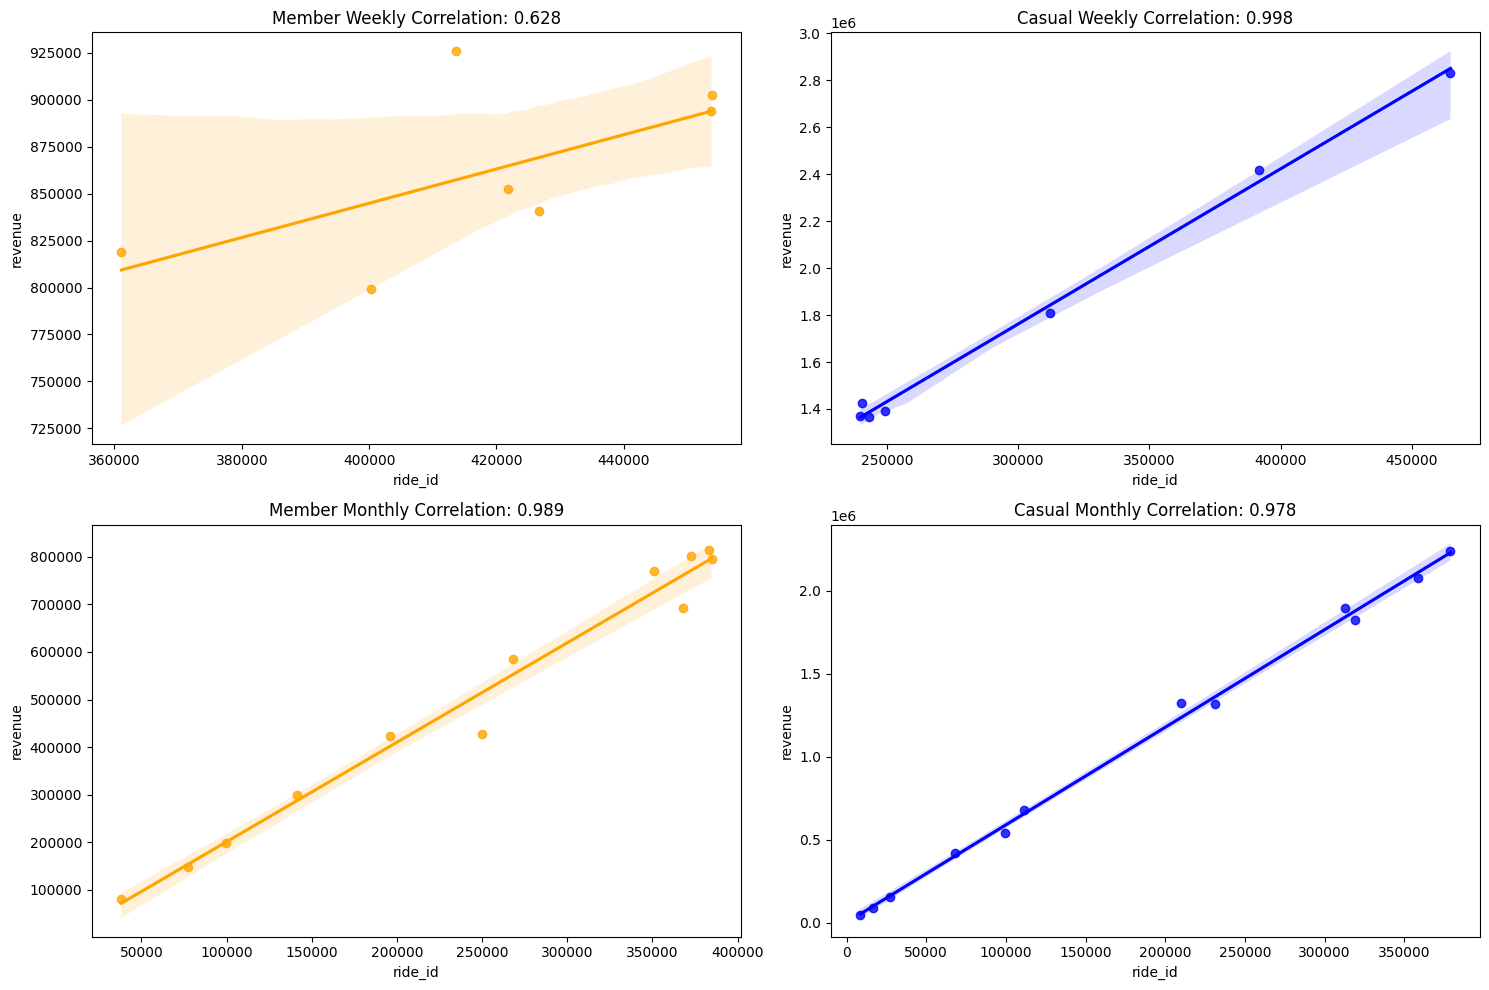

In [59]:
# Get the total number of rides and revenue generated by each member type
frequency_df = df.groupby('member_casual').agg({'ride_id':'count','revenue':'sum'}).reset_index()

# Casual riders summary
print('Casual riders generated ${0} from {1} rides.'.format(
    frequency_df[frequency_df['member_casual'] == 'casual']['revenue'].iloc[0].round(2),
    frequency_df[frequency_df['member_casual'] == 'casual']['ride_id'].iloc[0]
))

print('Members generated ${0} from {1} rides.'.format(
    frequency_df[frequency_df['member_casual'] == 'member']['revenue'].iloc[0].round(2),
    frequency_df[frequency_df['member_casual'] == 'member']['ride_id'].iloc[0]
))

# Weekly correlation for members
m_dcorr = member_df.groupby('day').agg({'ride_id':'count','revenue':'sum'}).reset_index()
d_corr = m_dcorr['ride_id'].corr(m_dcorr['revenue'])

# Weekly correlation for casual riders
c_dcorr = casual_df.groupby('day').agg({'ride_id':'count','revenue':'sum'}).reset_index()
dc_corr = c_dcorr['ride_id'].corr(c_dcorr['revenue'])


print('\nWeekly Correlation:\nMembers - {0}\nCasual Riders - {1}'.format(
    d_corr.round(3),
    dc_corr.round(3)
))

# Monthly correlation for members
m_mcorr = member_df.groupby('month').agg({'ride_id':'count','revenue':'sum'}).reset_index()
m_corr = m_mcorr['ride_id'].corr(m_mcorr['revenue'])

# Monthly correlation for casual riders
m_ccorr = casual_df.groupby('month').agg({'ride_id':'count','revenue':'sum'}).reset_index()
c_corr = m_ccorr['ride_id'].corr(m_mcorr['revenue'])



print('\nMonthly Correlation:\nMembers - {0}\nCasual Riders - {1}'.format(
    m_corr.round(3),
    c_corr.round(3)
))

# Create 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot weekly correlation for members
sns.regplot(ax=axes[0, 0], x='ride_id', y='revenue', data=m_dcorr, color='orange')
axes[0, 0].set_title(f'Member Weekly Correlation: {d_corr.round(3)}')

# Plot weekly correlation for casual riders
sns.regplot(ax=axes[0, 1], x='ride_id', y='revenue', data=c_dcorr, color='blue')
axes[0, 1].set_title(f'Casual Weekly Correlation: {dc_corr.round(3)}')

# Plot monthly correlation for members
sns.regplot(ax=axes[1, 0], x='ride_id', y='revenue', data=m_mcorr, color='orange')
axes[1, 0].set_title(f'Member Monthly Correlation: {m_corr.round(3)}')

# Plot monthly correlation for casual riders
sns.regplot(ax=axes[1, 1], x='ride_id', y='revenue', data=m_ccorr, color='blue')
axes[1, 1].set_title(f'Casual Monthly Correlation: {c_corr.round(3)}')

# Adjust layout
plt.tight_layout()
plt.show()


##### Recommendation
- There is a strong correlation between ride frequency and revenue, especially for casual riders. This indicates that driving more rides through marketing campaigns will directly impact revenue growth.
- Casual riders have a higher revenue per ride, making them a key target for promotions, while maintaining a steady focus on engaging members through loyalty incentives.

### Q4. Are there any seasonal trends in ride behavior that we can use to tailor our marketing strategies throughout the year?

Total Number of Rides by Season:
   season  total_rides
0    Fall      1653001
1  Spring       995094
2  Summer      2157153
3  Winter       267713


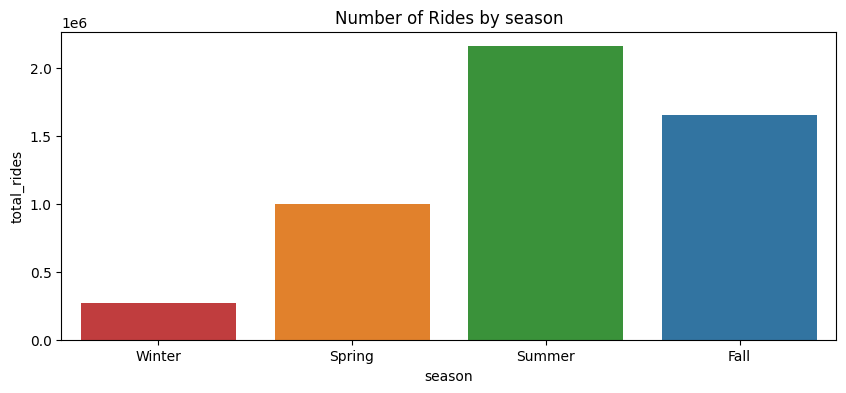

In [60]:
season_df = df.groupby('season').agg({'ride_id':'count'}).reset_index()
season_df.rename(columns={'ride_id':'total_rides'}, inplace=True)

print(f'Total Number of Rides by Season:\n{season_df}')
# Plot
season_order = ['Winter','Spring','Summer','Fall']
plt.figure(figsize = (10,4))
sns.barplot(data = season_df, x = 'season', y = 'total_rides', hue='season', order=season_order)
plt.title('Number of Rides by season')
plt.show()

##### Insight
- Summer had the most rides (2.15M), followed by Fall (1.65M), with Winter showing the least usage (267K rides)
- To sustain revenue during slower seasons like Winter, consider launching off-peak promotional campaigns or discounted membership rates.

### Q5. Which rideable types generate the most revenue from casual users and is the most popular among different member types (member vs. casual)?
- Insights for promoting specific ride types

In [61]:
# Which bike generated the most revnue from casual users
bike_df = casual_df.groupby(['rideable_type','member_casual']).agg({'revenue':'sum'}).sort_values(by = 'revenue', ascending=False).reset_index()
print('The {0} generated the most revenue with ${1} from CASUAL users.'.format(
    bike_df['rideable_type'].iloc[0].upper(),
    bike_df['revenue'].iloc[0].round(2)
))

The ELECTRIC_BIKE generated the most revenue with $5424713.29 from CASUAL users.


The most popular bike type:
Members - CLASSIC_BIKE with 1926626 rides
Casual - CLASSIC_BIKE with 1090628 rides.


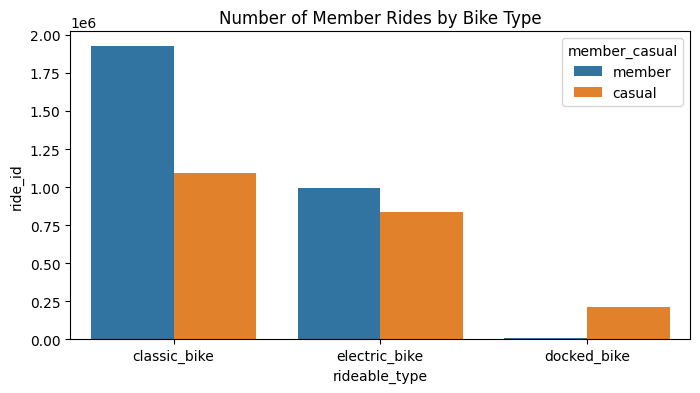

In [62]:
# Most popular amongst member types based on the number of rides
ride_df = df.groupby(['rideable_type','member_casual']).agg({'ride_id':'count'}).sort_values(by = 'ride_id', ascending=False).reset_index()
print('The most popular bike type:\nMembers - {0} with {1} rides\nCasual - {2} with {3} rides.'.format(
    ride_df[ride_df['member_casual'] == 'member']['rideable_type'].iloc[0].upper(),
    ride_df[ride_df['member_casual'] == 'member']['ride_id'].iloc[0],
    ride_df[ride_df['member_casual'] == 'casual']['rideable_type'].iloc[0].upper(),
    ride_df[ride_df['member_casual'] == 'casual']['ride_id'].iloc[0]
))

# Plot
plt.figure(figsize = (8,4))
sns.barplot(x = 'rideable_type', y = 'ride_id', hue = 'member_casual', data = ride_df) # plot the barplot
plt.title('Number of Member Rides by Bike Type')
plt.show() # display the plot

#### Insight
Promote electric bikes as a premium option to casual riders through special offers or pricing bundles to boost revenue, while retaining classic bike users with exclusive discounts or perks for members.

### Q6. Are there any observable patterns in ride-sharing during holidays or major events that could be leveraged in future strategies?

We had 183 holiday days.
2597804 holiday rides
2475157 non-holiday rides.


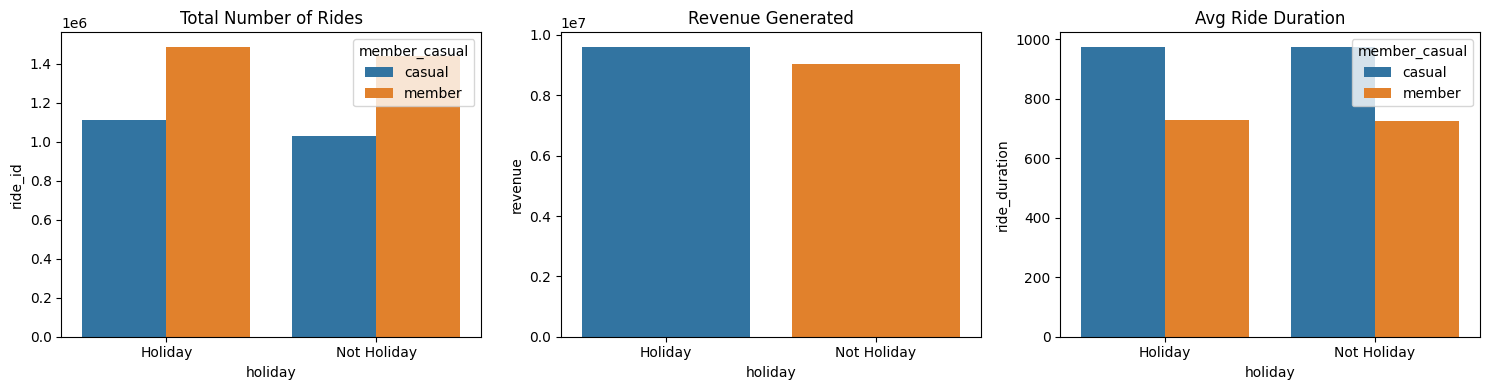

In [63]:
# Plot
# Total Number of Rides
fig, axes = plt.subplots(1,3, figsize = (15,4))
holiday_members = df.groupby(['holiday','member_casual']).agg({'ride_id':'count'}).reset_index()
sns.barplot(ax = axes[0], data = holiday_members, x = 'holiday', y = 'ride_id', hue = 'member_casual')
axes[0].set_title('Total Number of Rides')

# Revenue Generated
rev_holiday = df.groupby(['holiday']).agg({'revenue':'sum'}).reset_index()
sns.barplot(ax = axes[1], data = rev_holiday, x = 'holiday', y = 'revenue', hue = 'holiday')
axes[1].set_title('Revenue Generated')

# Avg Ride Duration
duration_holiday = df.groupby(['holiday','member_casual']).agg({'ride_duration':'mean'}).reset_index()
sns.barplot(ax = axes[2], data = duration_holiday, x = 'holiday', y = 'ride_duration', hue = 'member_casual')
axes[2].set_title('Avg Ride Duration')

print('We had {0} holiday days.\n{1} holiday rides\n{2} non-holiday rides.'.format(
    df[df['Date'].notna()][['Date']].nunique()['Date'],
    df['holiday'].value_counts()['Holiday'],
    df['holiday'].value_counts()['Not Holiday']
))

plt.tight_layout() 
plt.show()

#### Insight
Holidays see a noticeable spike in rides and revenue, making them ideal for special event-based promotions and campaigns to drive further usage.

## b. Operations
The operations department is responsible for the day-to-day functioning of the bike-sharing service, including bike maintenance, station management, and ensuring an adequate supply of bikes at various locations. Data needs:
- Station Utilization
- Operational Efficiency
- Resource Allocation

### Q1. What is the average ride duration across different times of the day?
- Streamlining operational staffing and bike maintenance schedules.

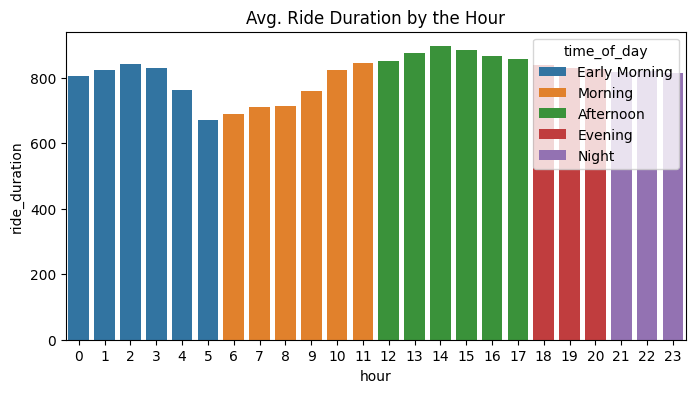

In [64]:
# group by the hour
hr_df = df.groupby('hour').agg({'ride_duration':'mean'}).reset_index()

# join the time of day and the hour with the avg duration
df_ht = df[['hour','time_of_day']].drop_duplicates().sort_values(by=['hour']).reset_index(drop=True)
df_todh = hr_df.merge(df_ht, on = 'hour', how= 'inner')

# Plot
plt.figure(figsize = (8,4))
sns.barplot(data = df_todh, x = 'hour', y = 'ride_duration', hue='time_of_day')
plt.title('Avg. Ride Duration by the Hour')
plt.show()

#### Insights
The average ride duration varies across different times of the day, with peak durations in the afternoon and lower durations in the early morning and night. This suggests a need for focused operational staffing during peak hours to enhance service quality.

### Q2. Are there specific times of day when ride demand peaks AND Which stations experience the highest volume of trips (start and end)?
- Optimizing bike availability and rebalancing efforts.

Text(0.5, 1.0, 'No. of Rides by time of Day')

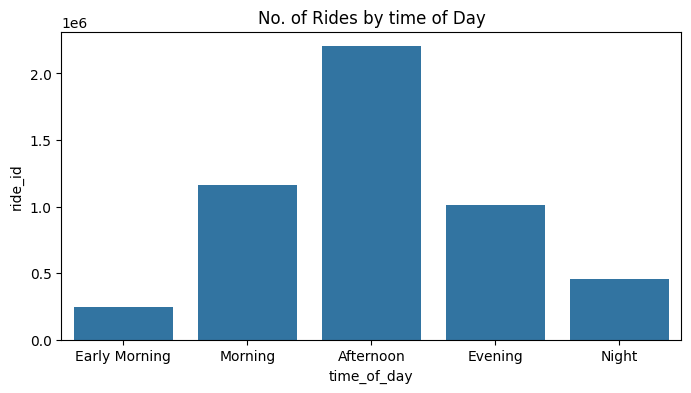

In [65]:
# Plot
tod_order = ['Early Morning', 'Morning','Afternoon','Evening','Night']
tod = df.groupby('time_of_day').agg({'ride_id':'count'}).reset_index()
plt.figure(figsize = (8,4))
sns.barplot(data = tod,x='time_of_day', y = 'ride_id', order = tod_order)
plt.title('No. of Rides by time of Day')

Which stations experience the highest volume at each times?

In [66]:
#  Start Station
start_station_df = df.groupby(['time_of_day','start_station_name']).agg({'ride_id':'count'}).sort_values(by=['ride_id'], ascending=False).reset_index()
end_station_df = df.groupby(['time_of_day','end_station_name']).agg({'ride_id':'count'}).sort_values(by=['ride_id'], ascending=False).reset_index()

print('Station usage by time of day:\n\nEarly Morning:\nStart - {0}\nEnd - {1}\n\nMorning:\nStart - {2}\nEnd - {3}\n\nAfternoon:\nStart - {4}\nEnd - {5}\n\nEvening:\nStart - {6}\nEnd - {7}\n\nNight:\nStart - {8}\nEnd - {9}'.format(
    start_station_df[start_station_df['time_of_day'] == 'Early Morning'][['start_station_name']].iloc[0]['start_station_name'],
    end_station_df[end_station_df['time_of_day'] == 'Early Morning'][['end_station_name']].iloc[0]['end_station_name'],
    start_station_df[start_station_df['time_of_day'] == 'Morning'][['start_station_name']].iloc[0]['start_station_name'],
    end_station_df[end_station_df['time_of_day'] == 'Morning'][['end_station_name']].iloc[0]['end_station_name'],
    start_station_df[start_station_df['time_of_day'] == 'Afternoon'][['start_station_name']].iloc[0]['start_station_name'],
    end_station_df[end_station_df['time_of_day'] == 'Afternoon'][['end_station_name']].iloc[0]['end_station_name'],
    start_station_df[start_station_df['time_of_day'] == 'Evening'][['start_station_name']].iloc[0]['start_station_name'],
    end_station_df[end_station_df['time_of_day'] == 'Evening'][['end_station_name']].iloc[0]['end_station_name'],
    start_station_df[start_station_df['time_of_day'] == 'Night'][['start_station_name']].iloc[0]['start_station_name'],
    end_station_df[end_station_df['time_of_day'] == 'Night'][['end_station_name']].iloc[0]['end_station_name']
))


Station usage by time of day:

Early Morning:
Start - Clark St & Elm St
End - St. Clair St & Erie St

Morning:
Start - Rockwell St & 57th St
End - Rockwell St & 57th St

Afternoon:
Start - Streeter Dr & Grand Ave
End - Streeter Dr & Grand Ave

Evening:
Start - Streeter Dr & Grand Ave
End - Streeter Dr & Grand Ave

Night:
Start - Wells St & Concord Ln
End - Wells St & Concord Ln


#### Insight
Ride demand peaks in the afternoon, with significant activity noted in the early morning and evening. 

### Q3. Are there any stations with consistent underutilization?
- Inform decisions on relocating underused stations or scaling back at certain areas.

Here is the technique I'll be using to get the underutilized stations:
1. Get the total number of rides from and to each station.
2. We went the median of the total number of rides from the stations.
3. Filter for stations below the median.
4. Apply K-Means algorithm to cluster the station
5. Pick the appropriate number of clusters by determining the inertia
6. Groupby the cluster number
7. Filter the stations clusters with the lowest mean number of rides.  

25% percentile: 717.25


,total_station_rides,cluster
cluster,,
0,348.142857,56
1,215.742424,66
2,583.476190,42
3,92.891304,46


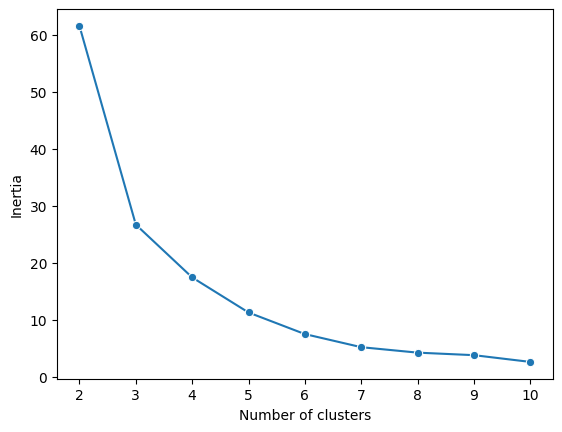

In [67]:
# Get the top start and end stations
top_start = df.groupby('start_station_name').agg({'ride_id':'count','revenue':'sum'}).sort_values(by ='ride_id', ascending=False).reset_index()
top_end = df.groupby('end_station_name').agg({'ride_id':'count','revenue':'sum'}).sort_values(by ='ride_id', ascending=False).reset_index()

# we can get the total number of rides from each station (start + end)
station_total = top_start.merge(top_end, left_on='start_station_name', right_on = 'end_station_name') # join start and end station
station_total['total_station_rides'] = station_total['ride_id_x'] + station_total['ride_id_y'] # get total number of rides from that station
station_total['avg_station_revenue'] = (station_total['revenue_x'] + station_total['revenue_y'])/2
station_total.rename(columns={'start_station_name':'station_name'}, inplace = True) #rename column

# filter for needed columns
station_df = station_total[['station_name','total_station_rides']].sort_values(by = 'total_station_rides', ascending=False).reset_index(drop=True) 

# get the 25% quantile
station_range = station_df['total_station_rides'].quantile(0.25)
print(f'25% percentile: {station_range}')

# Get stations below the median
lower_median = station_df[station_df['total_station_rides'] < station_range].reset_index(drop=True)


####### K-MEANS CLUSTERING ########

# Exclude columns
X = lower_median.drop(['station_name'], axis=1)
# Scale the features
X_scaled = StandardScaler().fit_transform(X)

# Fit K-means and evaluate inertia for differnt values of k
num_clusters = [i for i in range(2,11)]
def kmeans_inertia(num_clusters, x_vals):
    
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

# Return a list of inertia for k=2 to 10
inertia = kmeans_inertia(num_clusters, X_scaled)

plot = sns.lineplot(x=num_clusters, y=inertia, marker ='o')
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Inertia")

# Fit a 4-cluster model
kmeans4 = KMeans(n_clusters= 4, random_state=42)
kmeans4.fit(X_scaled)

# Create a cluster column
lower_median['cluster'] = kmeans4.labels_
lower_median.groupby('cluster').agg({'total_station_rides':'mean','cluster':'count'})

Cluster 3 has the lowest mean total number of station rides, so those stations are the most underutilized.

In [68]:
under_df = lower_median[lower_median['cluster'] == 3]
print('We have {0} underutilized stations from {1} stations.\nTotal station rides range from {2} to {3} rides.\n\nHere are the 10 most underutilized stations: \n{4}'.format(
    under_df.shape[0],
    station_df.shape[0],
    under_df['total_station_rides'].max(),
    under_df['total_station_rides'].min(),
    under_df.tail(10).sort_values(by=['total_station_rides']).reset_index(drop=True)[['station_name','total_station_rides']]
    
))

We have 46 underutilized stations from 838 stations.
Total station rides range from 152 to 3 rides.

Here are the 10 most underutilized stations: 
                             station_name  total_station_rides
0          Throop/Hastings Mobile Station                    3
1  HUBBARD ST BIKE CHECKING (LBS-WH-TEST)                    4
2    DIVVY CASSETTE REPAIR MOBILE STATION                    5
3               Chicago Ave & Dempster St                    5
4                   Western Ave & 28th St                   17
5                    Halsted St & 63rd St                   21
6                    Hamlin Ave & 62nd Pl                   27
7                     Doty Ave & 111th St                   37
8             N Damen Ave & W Wabansia St                   38
9            Washtenaw Ave & Peterson Ave                   50


#### Insights:
- We have 46 underutilized stations from 838 stations.
- Total station rides range from 152 to 3 rides.
- The top 10 underutilized stations have fewer than 50 rides each, indicating potential opportunities for resource reallocation or station relocation to enhance service accessibility and performance.

### Q4. What percentage of trips are taken on each rideable type and average ride duration, and how does that impact bike maintenance schedules?
-  Optimize resource allocation for maintenance and repairs.

   rideable_type  ride_id
0   classic_bike  3017254
1    docked_bike   221007
2  electric_bike  1834700

   rideable_type  ride_duration
0   classic_bike     833.378696
1    docked_bike    1275.199306
2  electric_bike     773.246603


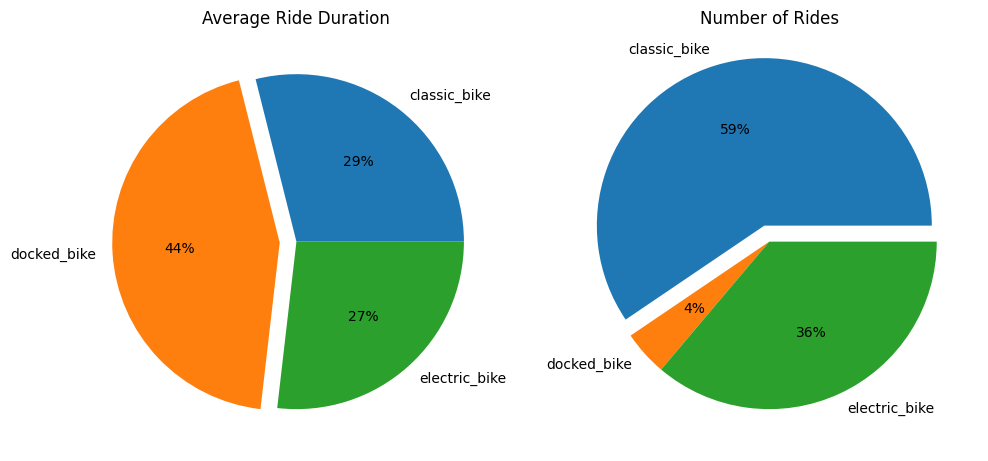

In [69]:
ride_df = df.groupby('rideable_type').agg({'ride_id':'count'}).reset_index()
avg_ride_df = df.groupby('rideable_type').agg({'ride_duration':'mean'}).reset_index()
print(ride_df)
print('')
print(avg_ride_df)
# Add explode values for the pie charts
ride_df['explode'] = [0.1, 0, 0]
avg_ride_df['explode'] = [0, 0.1, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(avg_ride_df['ride_duration'], labels=ride_df['rideable_type'], explode=avg_ride_df['explode'], autopct='%.0f%%')
axes[0].set_title('Average Ride Duration')


axes[1].pie(ride_df['ride_id'], labels=ride_df['rideable_type'], explode=ride_df['explode'], autopct='%.0f%%')
axes[1].set_title('Number of Rides')


plt.tight_layout()
plt.show()

#### Insights
- The classic bikes account for a substantial portion of trips, followed by electric bikes and docked bikes.
- Classic Bikes, being the most used, require more frequent maintenance cycles. However, their average ride duration is moderate, which balances the wear and tear.
- Electric Bikes, while used for shorter durations, are still heavily utilized. Their maintenance schedules should account for the higher complexity of repairs compared to classic bikes.
- Docked Bikes, despite fewer rides, have significantly longer usage per trip. This suggests they may endure more wear per ride, requiring targeted but less frequent maintenance interventions.

### Q5. How do weather patterns affect the number of rides and station usage?
- Preparing for operational shifts during different seasons.

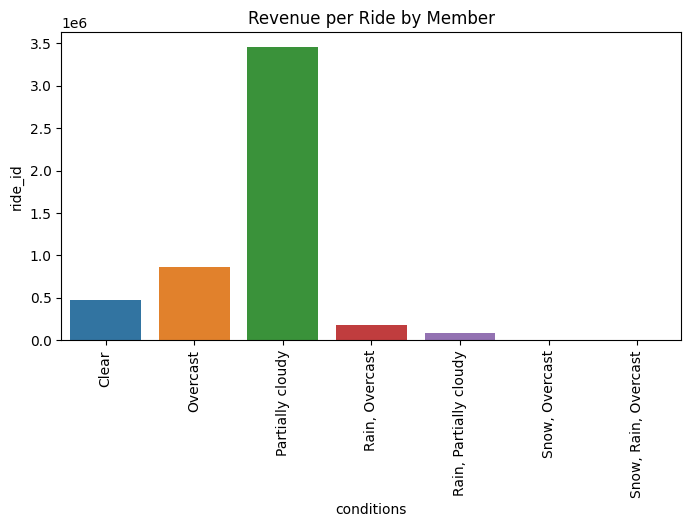

In [70]:
# Weather Conditions
weather_df = df.groupby(['conditions']).agg({'ride_id':'count'}).reset_index()

plt.figure(figsize = (8,4))
sns.barplot(data=weather_df, x='conditions', y='ride_id', hue='conditions')
plt.xticks(rotation=90)
plt.title('Revenue per Ride by Member')
plt.show()

#### Insights
Weather conditions significantly influence ride patterns. For instance, clear weather results in nearly 472,711 rides, whereas snowy conditions see a drastic decline, with only 1,860 rides logged. This necessitates preparation for operational shifts during varying seasons to ensure bike availability aligns with demand.

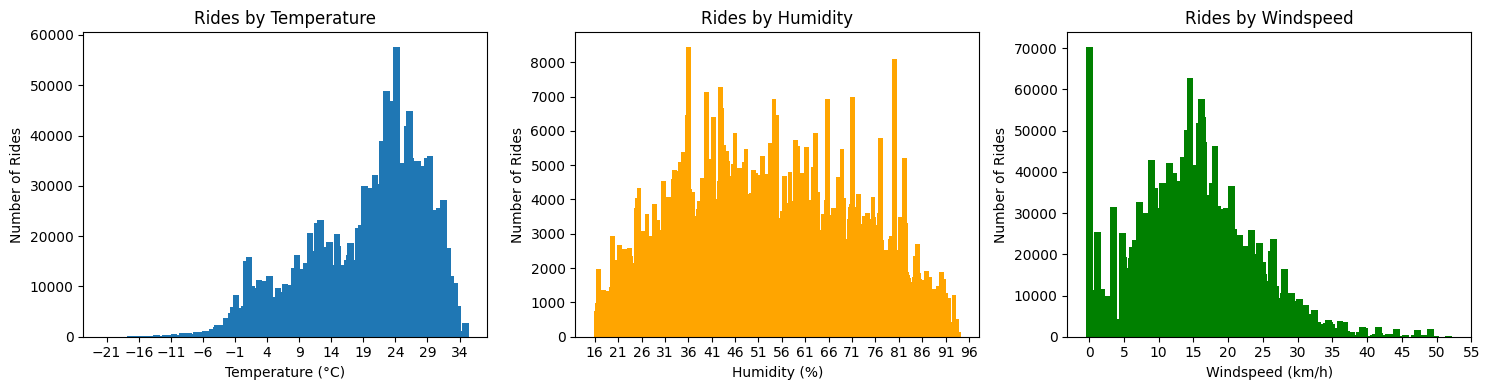

In [71]:
fig, axes = plt.subplots(1,3, figsize = (15,4))

# Temperature
temp_df = df.groupby(['temp']).agg({'ride_id':'count'}).reset_index()
bins_size_temp = list(range(int(temp_df['temp'].min()), int(temp_df['temp'].max()) + 5, 5))
axes[0].bar(temp_df['temp'], temp_df['ride_id'], width=1)
axes[0].set_xticks(bins_size_temp)
axes[0].set_title('Rides by Temperature')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Number of Rides')

# Humidity
humid_df = df.groupby(['humidity']).agg({'ride_id':'count'}).reset_index()
bins_size_humid = list(range(int(df['humidity'].min()), int(df['humidity'].max()) + 5, 5))
axes[1].bar(humid_df['humidity'], humid_df['ride_id'], width=1, color = 'orange')
axes[1].set_xticks(bins_size_humid)
axes[1].set_title('Rides by Humidity')
axes[1].set_xlabel('Humidity (%)')
axes[1].set_ylabel('Number of Rides')

# Windspeed
wind_df = df.groupby(['windspeed']).agg({'ride_id':'count'}).reset_index()
bins_size_wind = list(range(int(df['windspeed'].min()), int(df['windspeed'].max()) + 5, 5))
axes[2].bar(wind_df['windspeed'], wind_df['ride_id'], width=1, color = 'green')
axes[2].set_xticks(bins_size_wind)
axes[2].set_title('Rides by Windspeed')
axes[2].set_xlabel('Windspeed (km/h)')
axes[2].set_ylabel('Number of Rides')

plt.tight_layout()
plt.show()

## c. Customer Insights
 This department focuses on understanding customer behavior, preferences, and satisfaction levels to enhance the user experience and drive customer loyalty. Data needs:
 - User Retention
 - Behaviour Patterns
 - Demographic Insights

what is the % a casual member likely to use again based on the ride detail e.g youtube views to likes ratio

### Q1. Are there particular times or locations where casual riders are more likely to convert to members?

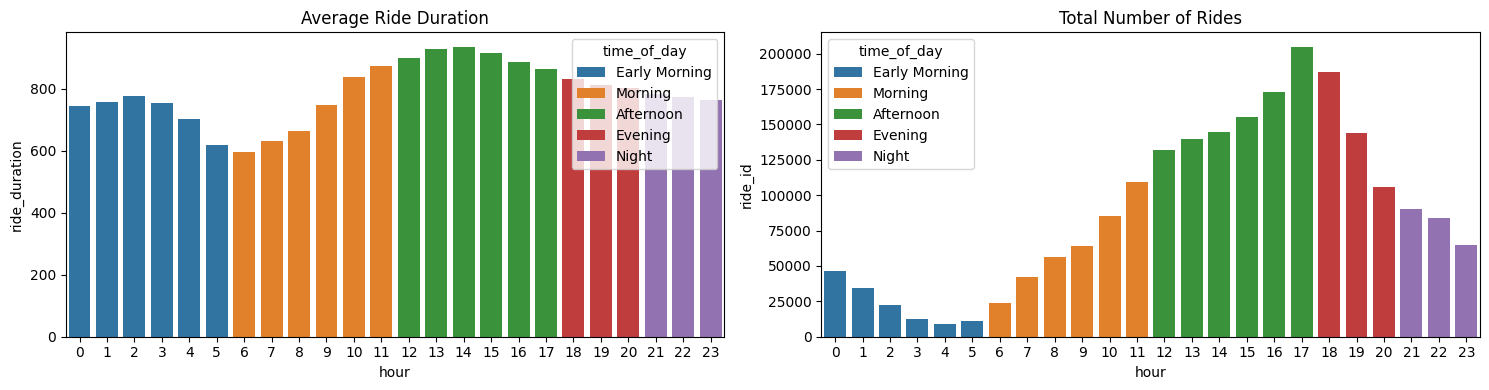

In [72]:
# get top casual riders rent time
cas_time = casual_df.groupby('hour').agg({'ride_duration':'median','ride_id':'count'}).reset_index()
cas_df = cas_time.merge(df_ht, on = 'hour', how= 'inner')

fig, axes = plt.subplots(1,2, figsize = (15,4))
sns.barplot(ax = axes[0], data=cas_df, x='hour', y='ride_duration',  hue = 'time_of_day')
axes[0].set_title('Average Ride Duration')

sns.barplot(ax = axes[1], data=cas_df, x='hour', y='ride_id',  hue = 'time_of_day')
axes[1].set_title('Total Number of Rides')


# get top casual riders rent location
plt.tight_layout()
plt.show()


#### Insight
Casual riders tend to convert to members during early mornings and throughout the day, with a notable increase in ride duration during these times. The average ride duration during peak conversion hours indicates a strong engagement that could be capitalized on through targeted marketing.

### Q2. What factors influence longer ride durations or higher revenue generation from casual riders?
- Identify customer behaviors to target high-value users.

In [73]:
# Filter for higher revenue and longer rides rides
rev_limit = casual_df['revenue'].quantile(0.75) #
duration_limit = casual_df['ride_duration'].quantile(0.75)

casual_high_df = casual_df[(casual_df['revenue'] > rev_limit) & (casual_df['ride_duration'] > duration_limit)]


print("For rides longer than {0} seconds and ride revenue over ${1} per trip.".format(
    duration_limit,
    rev_limit.round(2)  
))
print("Here are the factor that influence them:")
print('1. {0} temperature\n2. {1}\n3. {2} season\n4. {3}\n5. {4}\n6. {5}'.format(
    casual_high_df.groupby('temp_feel').agg({'ride_id':'count'}).reset_index().sort_values(by=['ride_id'], ascending=False).iloc[0]['temp_feel'],
    casual_high_df.groupby('conditions').agg({'ride_id':'count'}).reset_index().sort_values(by=['ride_id'], ascending=False).iloc[0]['conditions'],
    casual_high_df.groupby('season').agg({'ride_id':'count'}).reset_index().sort_values(by=['ride_id'], ascending=False).iloc[0]['season'],
    casual_high_df.groupby('day').agg({'ride_id':'count'}).reset_index().sort_values(by=['ride_id'], ascending=False).iloc[0]['day'],
    casual_high_df.groupby('rideable_type').agg({'ride_id':'count'}).reset_index().sort_values(by=['ride_id'], ascending=False).iloc[0]['rideable_type'],
    casual_high_df.groupby('holiday').agg({'ride_id':'count'}).reset_index().sort_values(by=['ride_id'], ascending=False).iloc[0]['holiday']
))


For rides longer than 1349.0 seconds and ride revenue over $7.42 per trip.
Here are the factor that influence them:
1. Warm temperature
2. Partially cloudy
3. Summer season
4. Saturday
5. electric_bike
6. Holiday


### Q3. What are the common routes taken by members compared to casual riders, and how can this inform our service offerings?

In [74]:
# Get the routes
df['route'] = df['start_station_name'] + ' - ' + df['end_station_name']

# Top
routes_df = df.groupby(['member_casual','route']).agg({'ride_id':'count','revenue':'sum'}).sort_values(by='ride_id', ascending=False).reset_index()

print('The most common routes taken:\nMembers - \n{0}\n\nCasuals - \n{1}'.format(
    routes_df[routes_df['member_casual'] == 'member'][['route']].iloc[0:10].reset_index()['route'],
    routes_df[routes_df['member_casual'] == 'casual'][['route']].iloc[0:10].reset_index()['route']
))

The most common routes taken:
Members - 
0      Rockwell St & 57th St - Rockwell St & 57th St
1    Campbell Ave & 51st St - Campbell Ave & 51st St
2     Rockwell St & 57th St - Campbell Ave & 51st St
3     Campbell Ave & 51st St - Rockwell St & 57th St
4          Ellis Ave & 60th St - Ellis Ave & 55th St
5      Western Ave & 62nd St - Rockwell St & 57th St
6      Rockwell St & 57th St - Western Ave & 62nd St
7          Ellis Ave & 55th St - Ellis Ave & 60th St
8     Ellis Ave & 60th St - University Ave & 57th St
9     University Ave & 57th St - Ellis Ave & 60th St
Name: route, dtype: object

Casuals - 
0    Streeter Dr & Grand Ave - Streeter Dr & Grand Ave
1      Campbell Ave & 51st St - Campbell Ave & 51st St
2                    Millennium Park - Millennium Park
3        Rockwell St & 57th St - Rockwell St & 57th St
4    Lake Shore Dr & Monroe St - Lake Shore Dr & Mo...
5        Michigan Ave & Oak St - Michigan Ave & Oak St
6            Streeter Dr & Grand Ave - Millennium Park
7    

#### Insights
- Members predominantly use routes between familiar neighborhoods, such as Rockwell St & 57th St, whereas casual riders frequent popular destinations, including Millennium Park and Lake Shore Dr.
- Understanding these routing preferences can guide enhancements in service offerings, such as better station placements and promotional events targeting casual users at popular spots.

### Q4. What insights can we derive from revenue generated per ride, particularly between member and casual categories?

Revenue Generated per Ride:
Members - $2.06
Casuals - $5.89


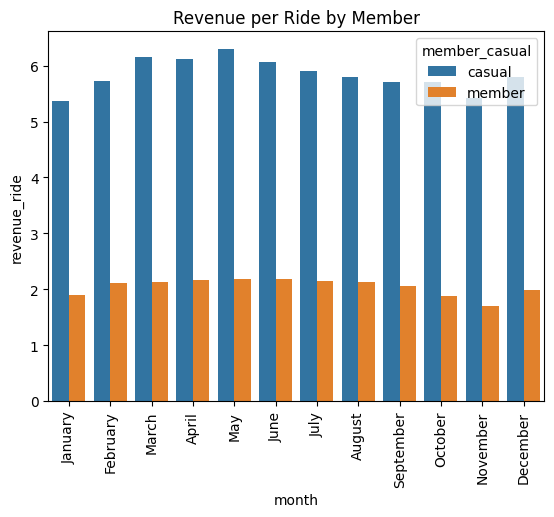

In [75]:
# get totat revenue genrated & per month for member casual
#reven_generated =
print('Revenue Generated per Ride:\nMembers - ${0}\nCasuals - ${1}'.format(
    (member_df['revenue'].sum()/member_df['ride_id'].count()).round(2),
    (casual_df['revenue'].sum()/casual_df['ride_id'].count()).round(2)
))

# Revenue/month for each member type
rev_month = df.groupby(['month','member_casual']).agg({'ride_id':'count','revenue':'sum'}).reset_index()
rev_month['revenue_ride'] = rev_month['revenue']/rev_month['ride_id']

sns.barplot(data=rev_month, x='month', y='revenue_ride', order=month_order, hue='member_casual')
plt.xticks(rotation=90)
plt.title('Revenue per Ride by Member')
plt.show()

#### Insight
- The average revenue generated per ride is notably higher for casual riders ($5.89) compared to members ($2.06). 
- This discrepancy suggests a need to explore pricing strategies and promotions that could encourage casual riders to convert to memberships.

### Q5. What are the differences in ride duration and frequency between members and casual users?

The ride duration:
Members - 572.0s
Casual Riders - 831.0s

Total number of rides:
Members - 2931099
Casual Riders - 2141862


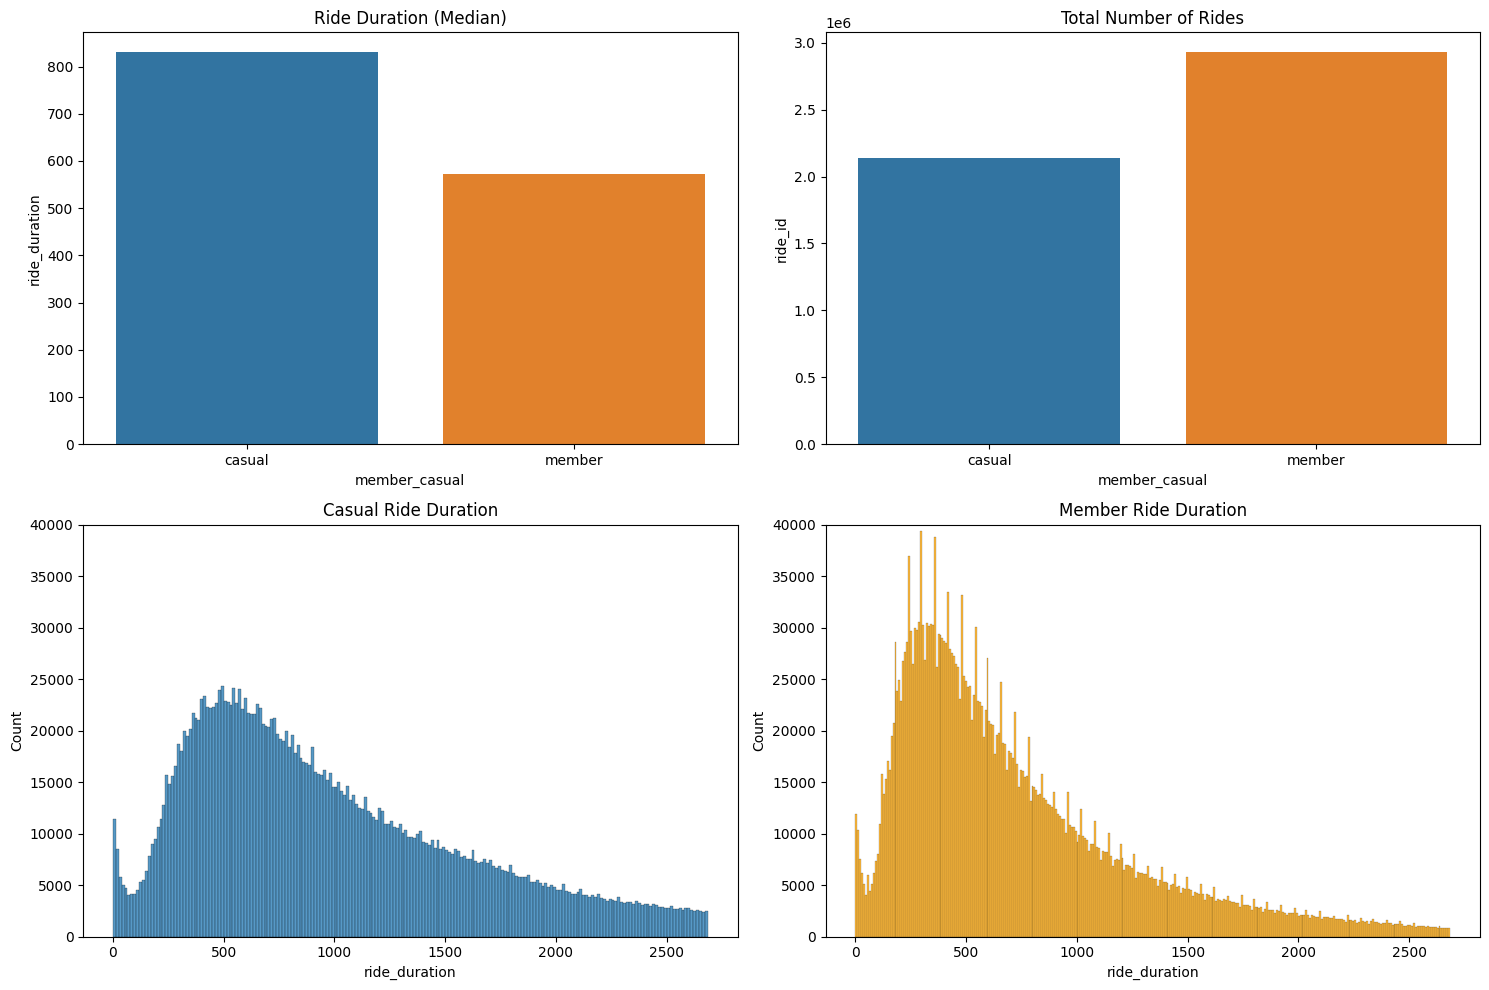

In [76]:
# Ride duration and number of rides summary
print('The ride duration:\nMembers - {0}s\nCasual Riders - {1}s'.format(
    member_df['ride_duration'].median(),
    casual_df['ride_duration'].median()
))
print('')
# Total number of rides
print('Total number of rides:\nMembers - {0}\nCasual Riders - {1}'.format(
    member_df['ride_id'].count(),
    casual_df['ride_id'].count()
))

# Grouped data for ride duration and number of rides
diff_df = df.groupby('member_casual').agg({'ride_duration':'median','ride_id':'count'}).reset_index()

# Create 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot for ride duration by member type
sns.barplot(ax=axes[0, 0], x='member_casual', y='ride_duration', data=diff_df, hue='member_casual')
axes[0, 0].set_title('Ride Duration (Median)')

# Bar plot for total number of rides by member type
sns.barplot(ax=axes[0, 1], x='member_casual', y='ride_id', data=diff_df, hue='member_casual')
axes[0, 1].set_title('Total Number of Rides')

# Histogram for casual riders' ride duration
sns.histplot(ax=axes[1, 0], x=casual_df['ride_duration'])
axes[1, 0].set_title('Casual Ride Duration')

# Histogram for member riders' ride duration
sns.histplot(ax=axes[1, 1], x=member_df['ride_duration'], color='orange')
axes[1, 1].set_title('Member Ride Duration')

# Set y-limit for histograms
y_limit = 40000
axes[1, 0].set_ylim(0, y_limit)
axes[1, 1].set_ylim(0, y_limit)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the combined plot
plt.show()


#### Insight
- Casual riders exhibit longer average ride durations (831 seconds) compared to members (572 seconds) but account for fewer total rides (2,141,862 casual vs. 2,931,099 member rides). 
- This indicates that while casual riders engage longer per ride, they ride less frequently. Strategies to increase frequency among casual riders could boost overall engagement and revenue.

## d. Finance
The finance department oversees the financial health of the bike-sharing service, managing budgets, forecasting revenue, and analyzing costs to ensure profitability. Data needs:
- Revenue Analysis
- Cost Management
- Budget Forecasting

### Q1. How does the total revenue generated fluctuate month-to-month, and what factors contribute to these fluctuations?
- Understand the primary revenue contributors.

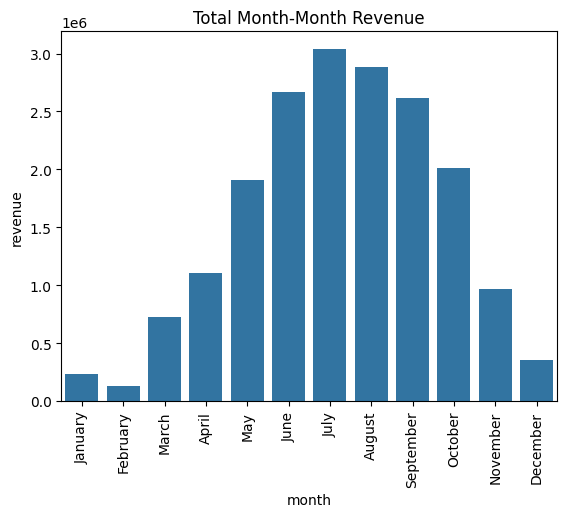

In [77]:
total_rev = df.groupby('month').agg({'revenue':'sum'})

sns.barplot(data=total_rev, x='month', y='revenue', order=month_order)
plt.xticks(rotation=90)
plt.title('Total Month-Month Revenue')
plt.show()

#### Insights
- Total revenue generated varied significantly across months, with August achieving the highest revenue of $2.89 million, followed by July at $3.04 million. Conversely, February recorded the lowest revenue at $130,151.
- The fluctuations in revenue can be attributed to seasonal demand and weather conditions that influence ridership.

### Q2. Which stations and locations generate the highest revenue?
- Allocate investments and expansions where revenue potential is highest.

Here are the top 10 highest revenue stations:
                station_name  avg_station_revenue
0    Streeter Dr & Grand Ave        424873.835083
1      Michigan Ave & Oak St        201010.173333
2            Millennium Park        193856.227083
3        Theater on the Lake        172510.763333
4             Shedd Aquarium        151013.477083
5      Wells St & Hubbard St        146567.384583
6       New St & Illinois St        136008.658167
7      Wells St & Concord Ln        134916.231583
8   Damen Ave & Wabansia Ave        134445.966333
9  Lake Shore Dr & Monroe St        126134.841417


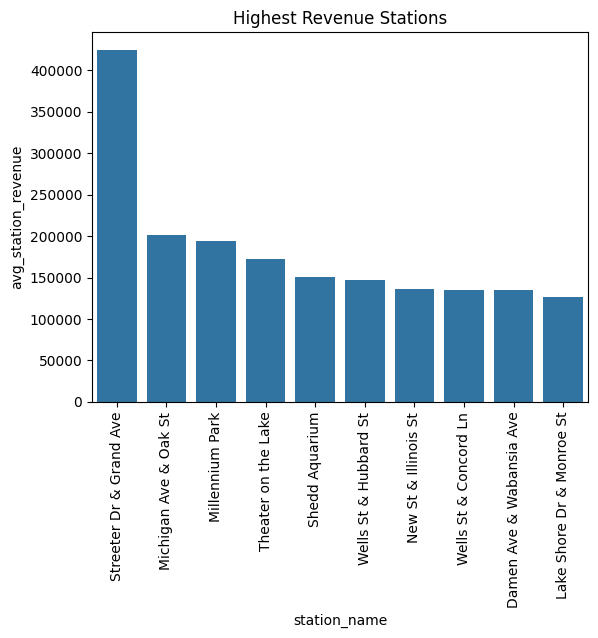

In [78]:
station_rev = station_total[['station_name','avg_station_revenue']]

# Get the top stations with highest revenue
top_rev = station_rev.sort_values(by='avg_station_revenue', ascending=False).reset_index(drop=True)

print('Here are the top 10 highest revenue stations:\n{0}'.format(
    top_rev.head(10)
))
a = top_rev.head(10)
sns.barplot(data=a, x=a['station_name'], y=a['avg_station_revenue'])
plt.xticks(rotation=90)
plt.title('Highest Revenue Stations')
plt.show()

#### Insights
- The analysis identified the top revenue-generating stations, with Streeter Dr & Grand Ave leading at an average revenue of $424,873. Other notable stations include Michigan Ave & Oak St ($201,010) and Millennium Park ($193,856).
- This insight suggests potential areas for investment and expansion, as these stations represent high revenue opportunities.

### Q3. What trends in revenue can be observed across different seasons, and how can these inform future budget planning?
- Adjust financial forecasting for seasonal shifts in ridership.

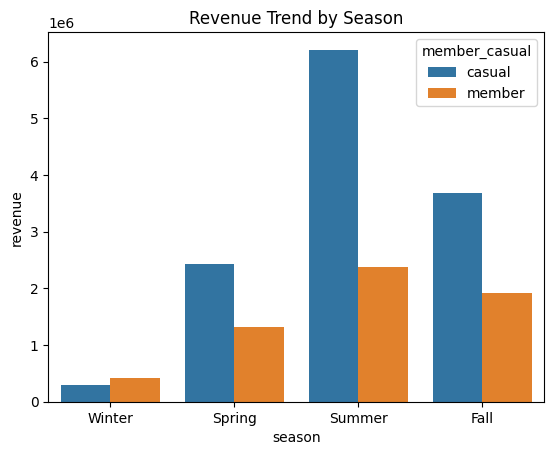

In [79]:
trend_df = df.groupby(['season','member_casual']).agg({'revenue':'sum'}).reset_index()

sns.barplot(data=trend_df, x='season', y='revenue', order=season_order, hue='member_casual')
plt.title('Revenue Trend by Season')
plt.show()

#### Insights
- Seasonal analysis revealed that Summer is the peak season for casual riders, generating approximately $6.21 million, compared to $4.64 million from members. 
- In contrast, Winter showed the lowest revenue for both member and casual categories.

### Q4. What is the overall profitability of different rideable types, and how should we allocate resources accordingly?

   rideable_type     revenue
0   classic_bike  9133810.41
1    docked_bike  2149127.74
2  electric_bike  7358896.25


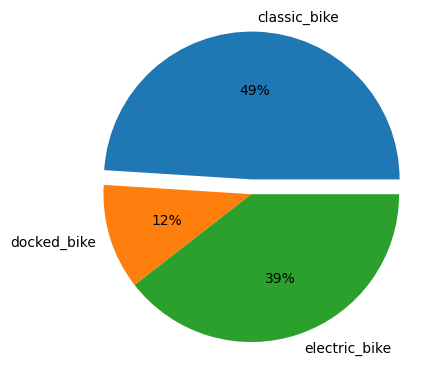

In [80]:
ride_profit = df.groupby('rideable_type').agg({'revenue':'sum'}).reset_index()

print(ride_profit.round(2))

# Plot
ride_profit['explode'] = [0.1,0,0]
plt.pie(ride_profit['revenue'], labels = ride_profit['rideable_type'], explode=ride_profit['explode'], autopct='%.0f%%')
plt.show()

#### Insights
- The analysis indicates that classic bikes generated the highest total revenue of $9.13 million, followed by electric bikes at $7.36 million. Docked bikes accounted for $2.15 million.
- These findings emphasize the need to focus on classic and electric bike offerings, potentially expanding their availability to enhance overall revenue.

# 3. Insights and Recommendations

### A. Marketing Department
Recommendations:
- Promotional Timing: Focus on late afternoon promotions, especially in July and September, to engage both casual and member riders.
- Target Key Stations: Design membership conversion campaigns around high-traffic stations like Streeter Dr & Grand Ave for casual riders.
- Seasonal Offers: Launch Winter discount campaigns or loyalty incentives to boost ridership during slower months.
- Ride Type Promotions: Push electric bike promotions to casual riders to leverage their higher revenue potential.
- Holiday Marketing: Capitalize on holidays with exclusive ride offers and event-based promotions to tap into increased ridership during these periods.

### B. Operations
Recommendations:
- Optimize Staffing and Maintenance: Adjust operational staffing and bike maintenance schedules to align with peak demand periods, particularly during afternoon and evening hours.
- Reassess Underutilized Stations: Consider relocating or scaling back services at underutilized stations to optimize resource allocation and potentially increase the efficiency of bike distribution across high-demand areas.
- Enhance Marketing Strategies: Develop targeted marketing strategies aimed at promoting bike usage during early morning and night to bolster ridership during these less-utilized periods.
- Weather Preparedness: Establish a proactive approach to manage fleet availability and maintenance in anticipation of weather fluctuations, ensuring service continuity regardless of conditions.
- Product Maintenance and Availability: To ensure efficient bike availability and reduce downtime, classic and electric bikes should have maintenance prioritized due to high ridership, while docked bikes should have checks focused on their longer ride durations.

### C. Customer Insights
Recommendations
- Targeted Marketing: Focus on converting casual riders by promoting membership benefits during peak conversion hours.
- Enhanced Customer Engagement: Utilize favorable weather and weekends to encourage longer rides through special offers or events.
- Route Optimization: Analyze common routes to improve station locations and provide better services aligned with rider preferences.
- Pricing Strategies: Consider flexible pricing models for casual users to enhance the appeal of transitioning to memberships.

### D. Finance
Recommendations
- Invest in High-Performing Stations: Focus on enhancing services and facilities at top-performing stations to drive even higher revenue.
- Seasonal Marketing Campaigns: Develop targeted marketing strategies during peak seasons to capitalize on increased ridership.
- Resource Allocation: Prioritize investments in classic and electric bikes, as they show significant profitability.

In [81]:
# Year-o-Year Trend
y_o_y_df = df.groupby(['month','member_casual']).agg({'ride_id':'count','revenue':'sum','ride_duration':'mean'}).reset_index()

# Station position 
station_an = station_total[['station_name','total_station_rides','avg_station_revenue']]
stat_post = df.groupby('end_station_name').agg({'end_lat':'mean','end_lng':'mean'}).reset_index()

stat_postion = station_an.merge(stat_post, left_on='station_name', right_on = 'end_station_name', how='left')

In [82]:
wind_df

,windspeed,ride_id
0,0.0,70344
1,0.6,11303
2,0.9,3040
3,1.1,2700
4,1.2,25414
...,...,...
390,48.2,352
391,49.1,1757
392,49.2,214
393,49.8,246


In [83]:
y_o_y_df.to_csv(r'./Query/Year-o-Year.csv', index=False)
stat_postion.to_csv(r'./Query/Station Information.csv', index=False)